<a href="https://colab.research.google.com/github/cyber-privacy-analytics/DataScienceChegg/blob/main/Working_w_Linear_Classifiers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats

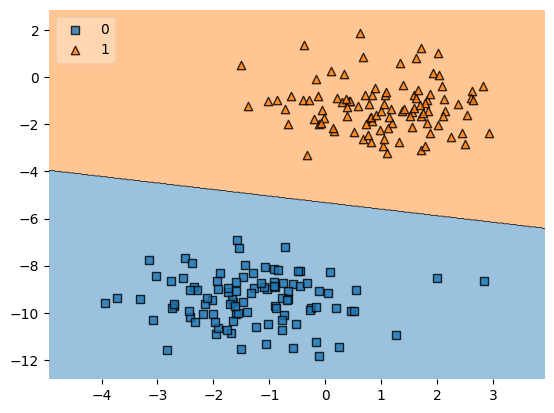

In [ ]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.0, random_state=2)

lr = LogisticRegression(solver='lbfgs', random_state=2)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2)
plt.show()

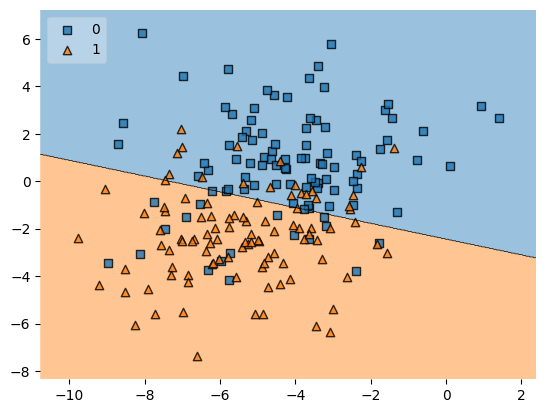

In [ ]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2.0, random_state = 225)

lr = LogisticRegression(solver='lbfgs', random_state=4)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2)
plt.show()

In [ ]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Select 50 samples and two features (for simplicity)
data_df = pd.DataFrame(breast_cancer.data[25:75], columns=breast_cancer.feature_names)
data_df = data_df[['mean radius', 'mean compactness']]
target_df = pd.DataFrame(breast_cancer.target[25:75])
target_df.columns = ['benign']

# Get the min and max on the x-axis for plotting lines later
minX = data_df['mean radius'].min()
maxX = data_df['mean radius'].max()

print(data_df.head())
print(target_df.head())

   mean radius  mean compactness
0        17.14            0.2276
1        14.58            0.1868
2        18.61            0.1066
3        15.30            0.1697
4        17.57            0.1157
   benign
0       0
1       0
2       0
3       0
4       0


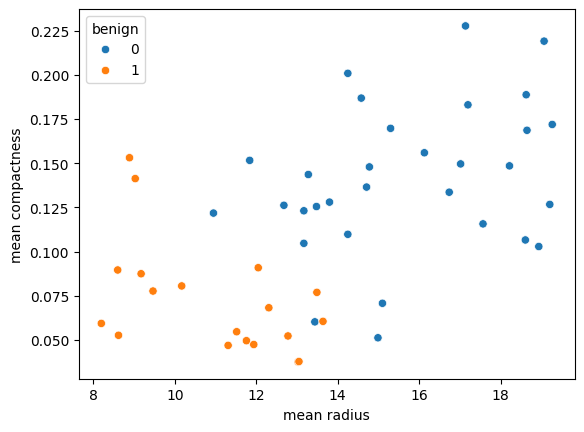

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
plt.show()

In [ ]:
def drawLine(plt, m, c, min, max):
  x = np.linspace(min, max)
  y = m * x + c
  plt.plot(x, y, 'g-')

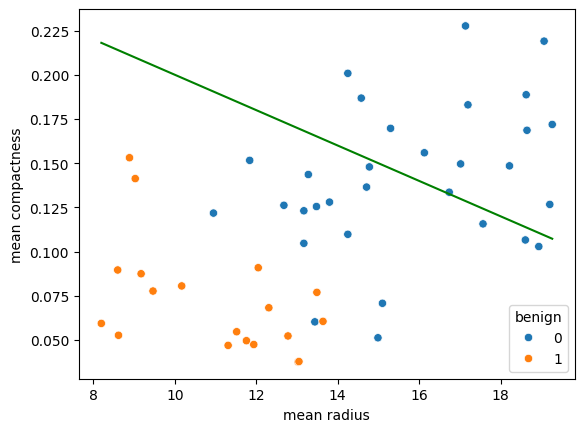

In [ ]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
# Draw a line at some arbitrary place
drawLine(plt, -0.01, 0.3, minX, maxX)
plt.show()

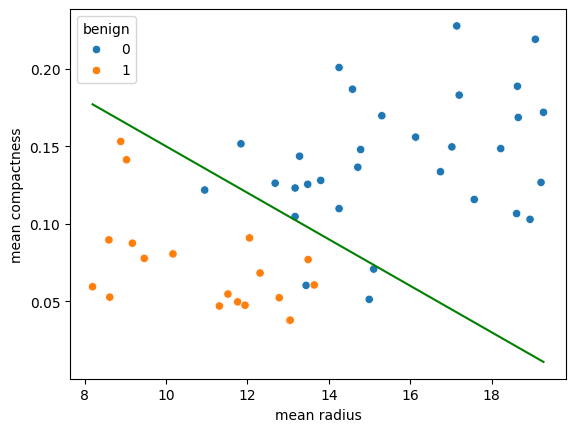

In [ ]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
drawLine(plt, -0.015, 0.3, minX, maxX)
plt.show()

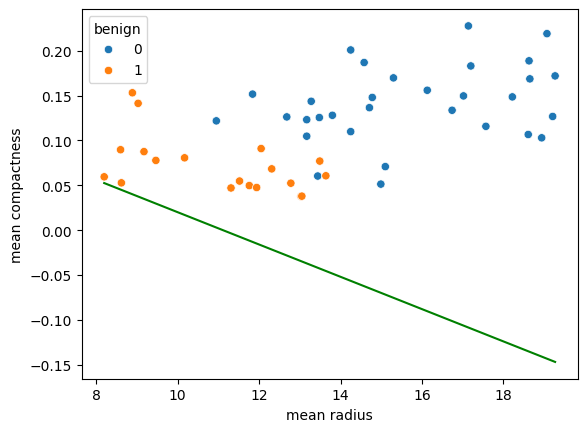

In [ ]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
drawLine(plt, -0.018, 0.2, minX, maxX)
plt.show()

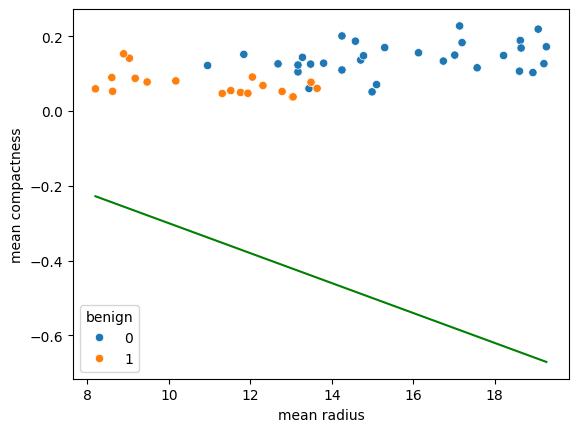

In [ ]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
drawLine(plt, -0.04, 0.1, minX, maxX)
plt.show()

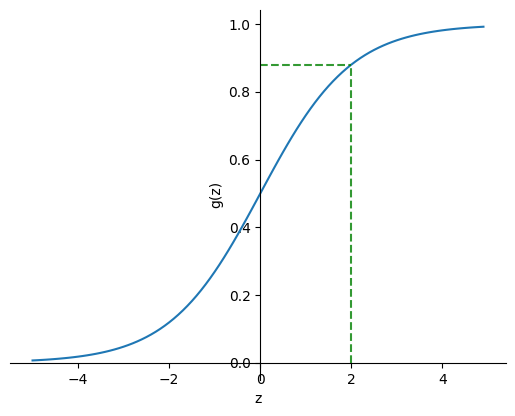

In [ ]:
z = np.arange(-5, 5, 0.1)
g = 1 / (1 + np.exp(-z))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(z, g)
plt.plot([2, 2], [0, (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.plot([0, 2], [(1/(1 + np.exp(-2))), (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

In [ ]:
# `z` is a vector of real numbers
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

In [ ]:
x1 = [1, 0.4, 1.3]
theta = [0.1, -1.2, 0.3]
sample1 = predict(x1, theta)

print('For sample 1: ', sample1)

x2 = [1, 0.1, 0.002]
sample2 = predict(x2, theta)

print('For sample 2: ', sample2)

For sample 1:  0.502499979166875
For sample 2:  0.49515015210644203


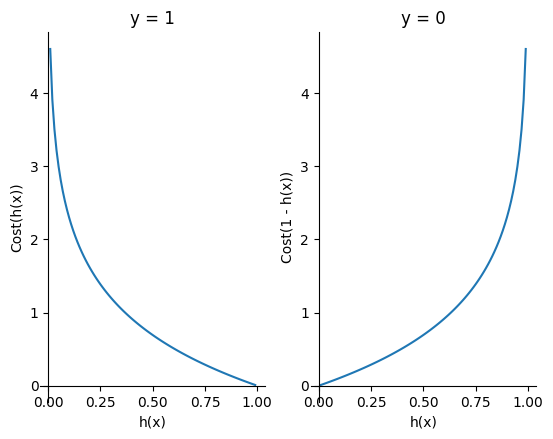

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.arange(0.01, 1, 0.01)
g = -np.log(z)
ax1.spines['left'].set_position(('data', 0.0))
ax1.spines['bottom'].set_position(('data', 0.0))
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.plot(z, g)
ax1.set(xlabel='h(x)', ylabel='Cost(h(x))')
ax1.set_title('y = 1')

g = -np.log(1 - z)
ax2.spines['left'].set_position(('data', 0.0))
ax2.spines['bottom'].set_position(('data', 0.0))
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.plot(z, g)
ax2.set(xlabel='h(x)', ylabel='Cost(1 - h(x))')
ax2.set_title('y = 0')

plt.show()

In [ ]:

def cost(pred, y):
  return -y * np.log(pred) - (1 - y) * np.log(1 - pred)

# Prediction is close to 0, y = 0 (small error)
y = 0
pred = 0.00001
print("y = 0, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 0 (large error)
pred = 0.99999
print("y = 0, pred close to one: ", cost(pred, y))

y = 1
pred = 0.00001
# Prediction is close to 0, y = 1 (large error)
print("y = 1, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 1 (small error)
pred = 0.99999
print("y = 1, pred close to one: ", cost(pred, y))

y = 0, pred close to zero:  1.0000050000287824e-05
y = 0, pred close to one:  11.51292546497478
y = 1, pred close to zero:  11.512925464970229
y = 1, pred close to one:  1.0000050000287824e-05


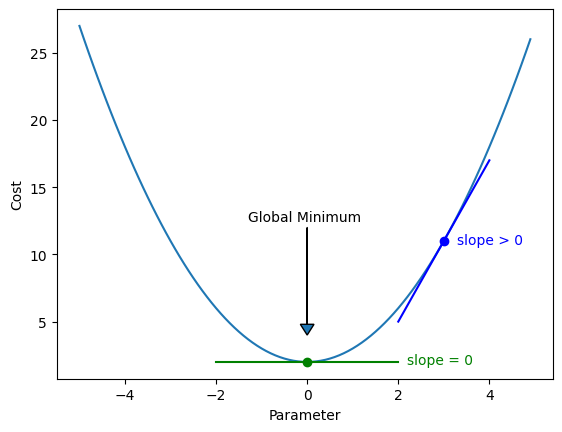

In [ ]:
z = np.arange(-5, 5, 0.1)
g = z**2 + 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, g)
plt.plot([0], [2], 'og')
plt.plot([-2, 2], [2, 2], '-g')
plt.arrow(0, 12, 0, -8, length_includes_head=True, head_width=0.3, head_length=0.8)
plt.text(-1.3, 12.5, 'Global Minimum')

plt.text(2.2, 1.8, 'slope = 0', color='g')
plt.plot([3], [11], 'ob')
plt.plot([2, 4], [5, 17], '-b')
plt.text(3.3, 10.8, 'slope > 0', color='b' )
plt.xlabel('Parameter')
plt.ylabel('Cost')
plt.show()

In [ ]:
def cost(pred, y):
  return (-y * np.log(pred)) - ((1 - y) * np.log(1 - pred))

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

# This function is doing the main work of updating the weights in each iteration
def update_theta(features, weights, labels, learning_rate):
  M = len(features)
  predictions = predict(features, weights)
  gradient = np.dot(features.T, predictions - labels)
  gradient /= M   # Calculate gradient average
  gradient *= learning_rate # Multiply by learning rate
  weights -= gradient # Subtract from weights
  return weights


def train(features, labels, weights, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weights = update_theta(features, weights, labels, learning_rate)

        # Calculate error for auditing purposes
        pred = predict(features, weights)

        iter_cost = cost(pred, labels)
        cost_history.append(iter_cost.sum())


    return weights, cost_history



In [ ]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Select 50 samples and 2 features (for simplicity)
data_df = pd.DataFrame(breast_cancer.data[25:75], columns=breast_cancer.feature_names)
data_df = data_df[['mean radius', 'mean compactness']]
data_df.insert(0, 'coef_1', 1)
target_df = pd.DataFrame(breast_cancer.target[25:75])
target_df.columns = ['benign']

initial_weights = [1.0, 1.0, 1.0]
learning_rate = 0.0005
MAX_ITER= 1000


weights, cost_history = train(data_df.values, target_df['benign'].values, initial_weights, learning_rate, MAX_ITER);

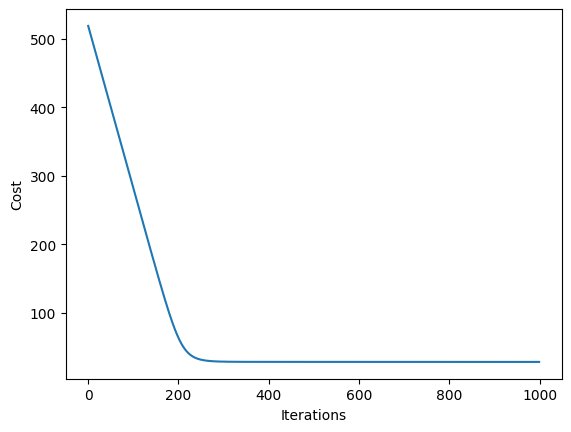

In [ ]:
z = np.arange(0, MAX_ITER)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Load the dataset
breast_cancer = load_breast_cancer()

data_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, breast_cancer.target, random_state=2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_no_reg = LogisticRegression(solver='lbfgs', penalty=None, random_state=2, max_iter=1000)
lr_no_reg.fit(X_train_scaled, y_train)

print('accuracy score (no regularization): %s' % lr_no_reg.score(X_test_scaled, y_test))
print('# of iterations (no regularization): %s' % lr_no_reg.n_iter_[0])

accuracy score (no regularization): 0.9230769230769231
# of iterations (no regularization): 36


In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty= None, max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

accuracy score: 0.958041958041958
# of iterations 2000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty= 'none', max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

In [ ]:
# Train and evaluate the model with a different C value
lr_tuned = LogisticRegression(solver='lbfgs', penalty='l2', random_state=2, max_iter=1000, C=0.1)
lr_tuned.fit(X_train_scaled, y_train)

print('accuracy score with C=0.1: %s' % lr_tuned.score(X_test_scaled, y_test))
print('# of iterations with C=0.1: %s' % lr_tuned.n_iter_[0])

In [ ]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

In [ ]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr_no_reg.coef_[0]),1)
y = lr_no_reg.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

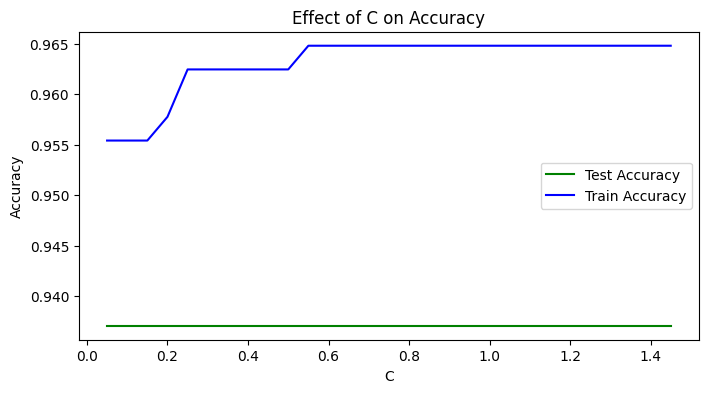

In [ ]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [ ]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)
data_df_scaled = pd.DataFrame(scaled_data, columns=breast_cancer.feature_names)
data_df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df_scaled, breast_cancer.target, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9859154929577465
Score on test data:  0.972027972027972
